In [36]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
import yfinance as yf
import pandas as pd

# Define the assets
assets = ['TSLA', 'BND', 'SPY']

# Fetch data for each asset from 01-Jan-2015 to 31-Jan-2025
data = {asset: yf.download(asset, start="2015-01-01", end="2025-01-31") for asset in assets}

# Display sample data for TSLA
print(data['TSLA'].head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           TSLA       TSLA       TSLA       TSLA      TSLA
Date                                                            
2015-01-02  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.253333  14.000667  14.187333  51637500


<Figure size 1000x600 with 0 Axes>

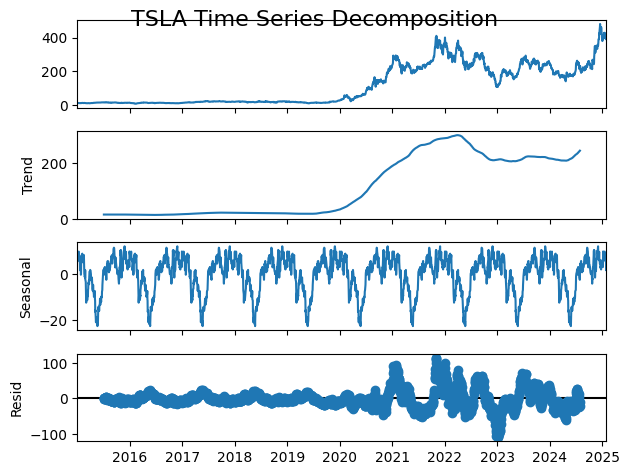

<Figure size 1000x600 with 0 Axes>

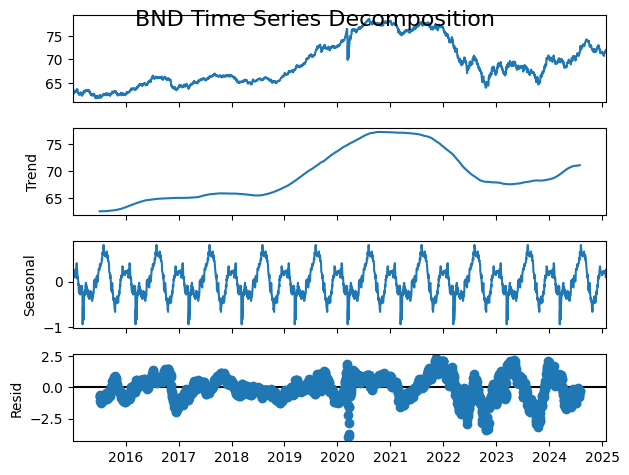

<Figure size 1000x600 with 0 Axes>

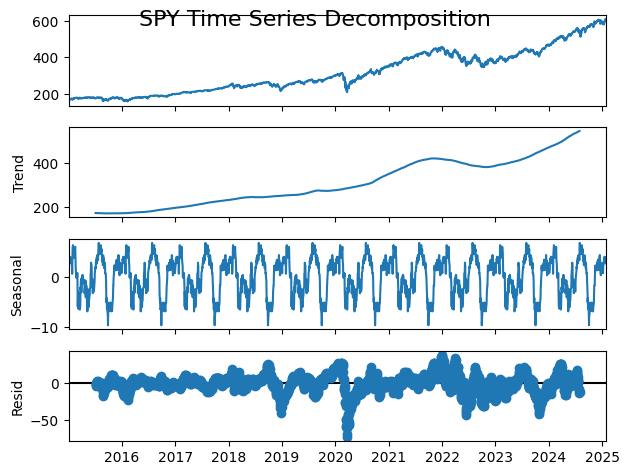

In [4]:


for asset in assets:
    plt.figure(figsize=(10,6))
    decomposition = sm.tsa.seasonal_decompose(data[asset]['Close'], model='additive', period=252)  # 252 trading days per year
    decomposition.plot()
    plt.suptitle(f'{asset} Time Series Decomposition', fontsize=16)
    plt.show()


ARIMA model

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Processing TSLA...
ARIMA Model Metrics for TSLA:
MAE: 89.49
RMSE: 110.74
MAPE: nan%


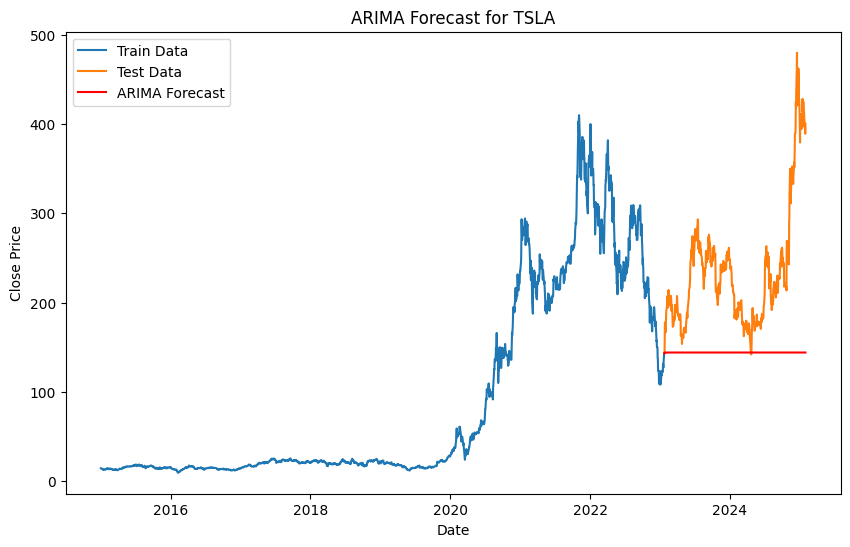


Processing BND...
ARIMA Model Metrics for BND:
MAE: 1.79
RMSE: 2.28
MAPE: nan%


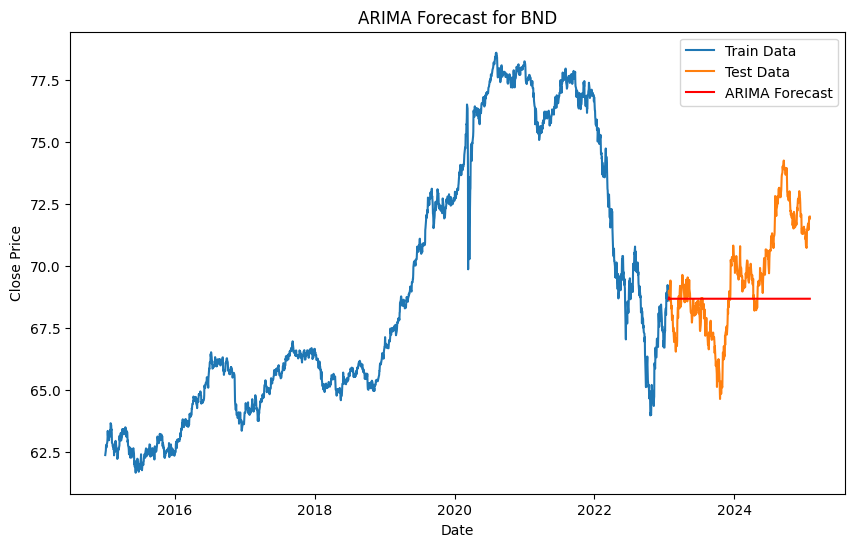


Processing SPY...
ARIMA Model Metrics for SPY:
MAE: 96.17
RMSE: 117.82
MAPE: nan%


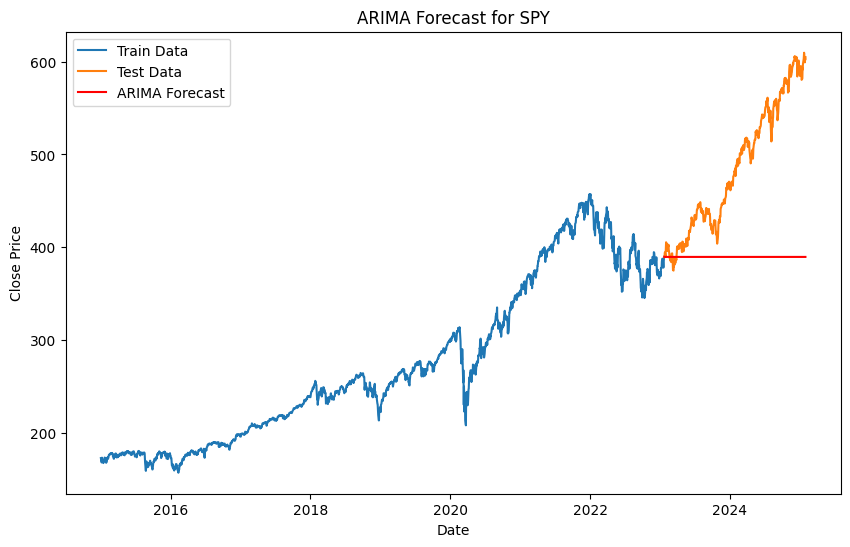

In [ ]:
# Step 1: Define Assets
assets = ['TSLA', 'BND', 'SPY']

# Step 2: Fetch Data
data = {asset: yf.download(asset, start="2015-01-01", end="2025-01-31") for asset in assets}

# Step 3: Process Data and Fit ARIMA Models
for asset in assets:
    print(f"\nProcessing {asset}...")
    
    # Extract 'Close' prices
    close_series = data[asset]['Close']
    
    # Train-Test Split (80% train, 20% test)
    split_idx = int(len(close_series) * 0.8)
    train_data = close_series.iloc[:split_idx]
    test_data = close_series.iloc[split_idx:]
    
    # Ensure frequency is set (e.g., business days)
    train_data = train_data.asfreq('B').ffill()
    train_data.index.freq = 'B'
    
    # Fit ARIMA Model (p, d, q) = (5, 1, 0)
    arima_model = ARIMA(train_data, order=(5, 1, 0))
    arima_model_fit = arima_model.fit()
    
    # Forecast for the length of the test data
    forecast_steps = len(test_data)
    forecast = arima_model_fit.forecast(steps=forecast_steps)
    
    # Align forecast index with test_data
    forecast_values = forecast
    forecast_values.index = test_data.index[:forecast_steps]
    
    # Calculate Evaluation Metrics
    mae = mean_absolute_error(test_data, forecast_values)
    rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
    mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
    
    print(f"ARIMA Model Metrics for {asset}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    # Plot Results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Train Data')
    plt.plot(test_data.index, test_data, label='Test Data')
    plt.plot(forecast_values.index, forecast_values, label='ARIMA Forecast', color='red')
    plt.title(f'ARIMA Forecast for {asset}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

SARIMA model

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Processing TSLA...
SARIMA Model Metrics for TSLA:
MAE: 90.68
RMSE: 111.83
MAPE: nan%


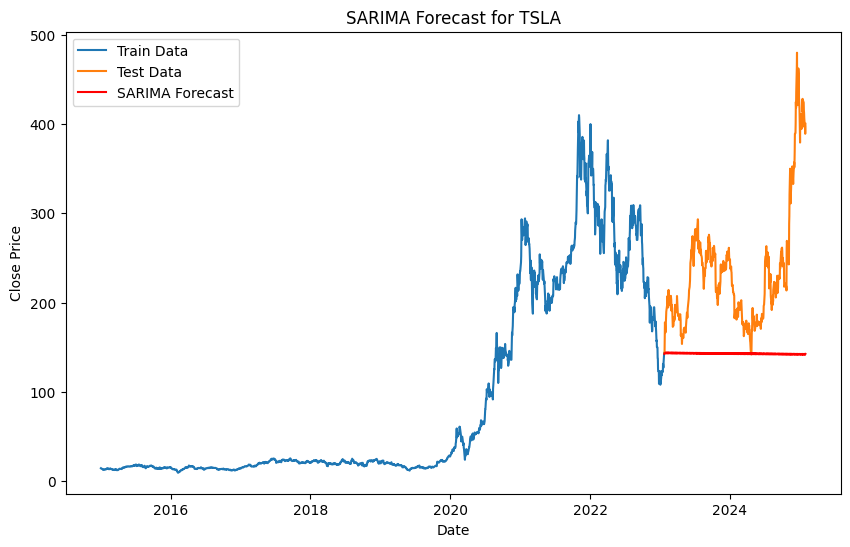


Processing BND...
SARIMA Model Metrics for BND:
MAE: 2.46
RMSE: 3.17
MAPE: nan%


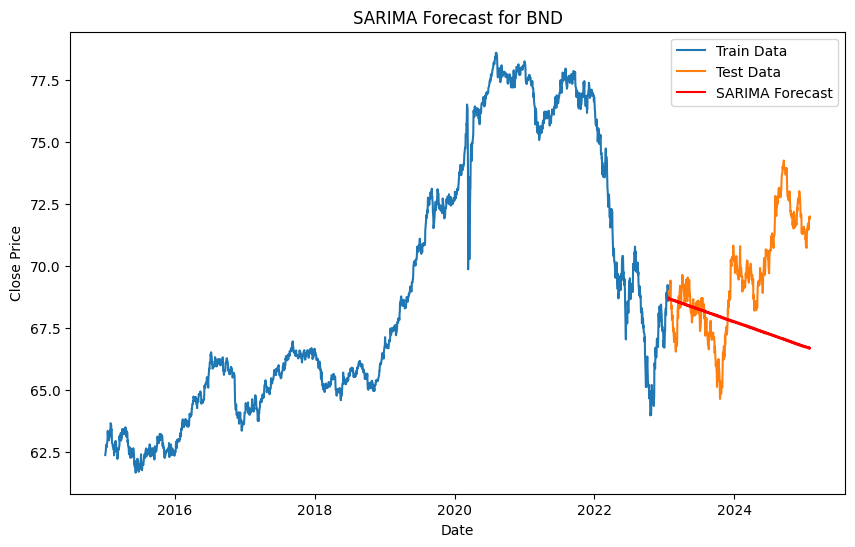


Processing SPY...
SARIMA Model Metrics for SPY:
MAE: 70.21
RMSE: 87.89
MAPE: nan%


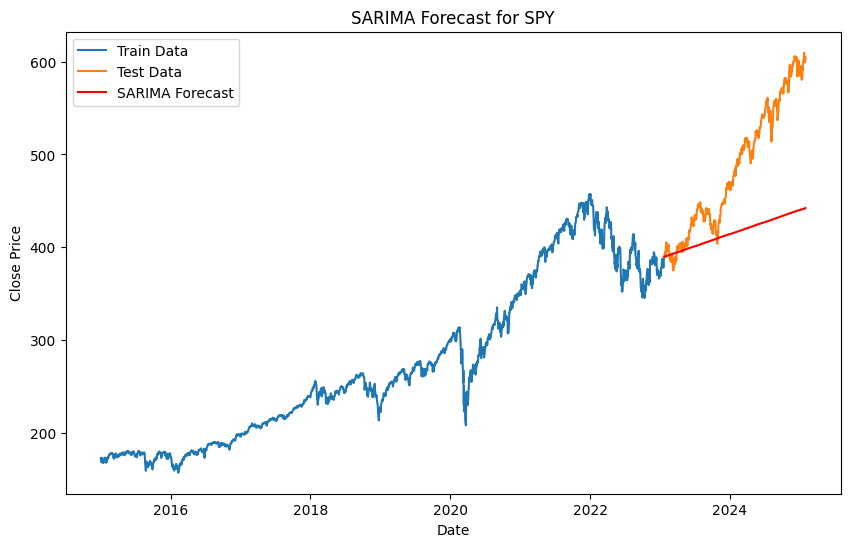

In [ ]:

# Step 1: Define Assets
assets = ['TSLA', 'BND', 'SPY']

# Step 2: Fetch Data
data = {asset: yf.download(asset, start="2015-01-01", end="2025-01-31") for asset in assets}

# Step 3: Process Data and Fit SARIMA Models
for asset in assets:
    print(f"\nProcessing {asset}...")
    
    # Extract 'Close' prices
    close_series = data[asset]['Close']
    
    # Train-Test Split (80% train, 20% test)
    split_idx = int(len(close_series) * 0.8)
    train_data = close_series.iloc[:split_idx]
    test_data = close_series.iloc[split_idx:]
    
    # Ensure frequency is set (e.g., business days)
    train_data = train_data.asfreq('B').ffill()
    train_data.index.freq = 'B'
    
    # Fit SARIMA Model
    sarima_model = SARIMAX(train_data,
                           order=(4, 1, 0),           # Non-seasonal AR(4)
                           seasonal_order=(1, 1, 1, 5),  # Seasonal period = 5 days
                           enforce_stationarity=False,
                           enforce_invertibility=False)
    sarima_model_fit = sarima_model.fit()
    
    # Forecast for the length of the test data
    forecast_steps = len(test_data)
    forecast = sarima_model_fit.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    
    # Align forecast index with test_data
    forecast_values.index = test_data.index[:forecast_steps]
    
    # Calculate Evaluation Metrics
    mae = mean_absolute_error(test_data, forecast_values)
    rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
    mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
    
    print(f"SARIMA Model Metrics for {asset}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    # Plot Results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Train Data')
    plt.plot(test_data.index, test_data, label='Test Data')
    plt.plot(forecast_values.index, forecast_values, label='SARIMA Forecast', color='red')
    plt.title(f'SARIMA Forecast for {asset}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

LSTM model

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Processing TSLA...
Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0175
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 9.8383e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 7.3042e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 7.8260e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6.1657e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.9515e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.1395e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.1098e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 5.1770e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.3219e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 4.0069e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.7985e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.3427e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 3.7188e-04

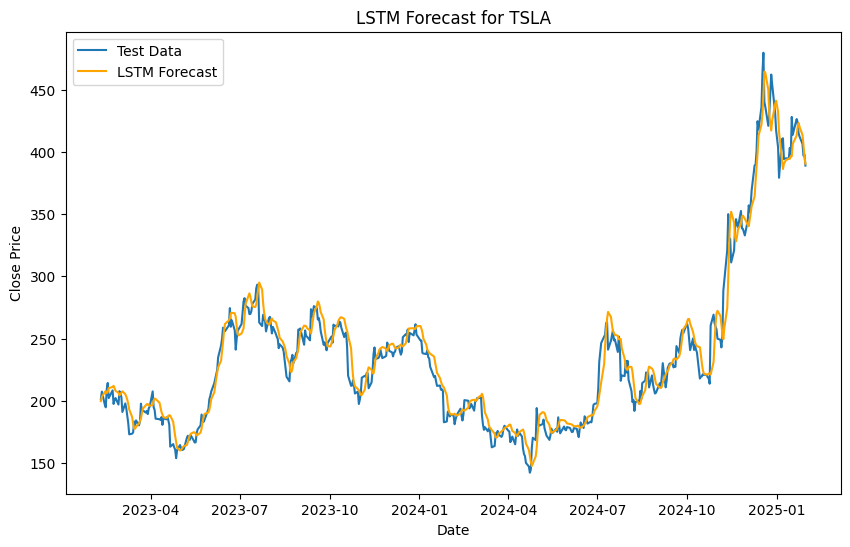


Processing BND...
Epoch 1/20


c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0730
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0012
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 8.9780e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0010
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0010
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 8.1564e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 8.4751e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 7.5626e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 8.1160e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.6404e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.3144e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 6.7186e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 6.5340e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 7.9774e-04
Epoch 15/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 

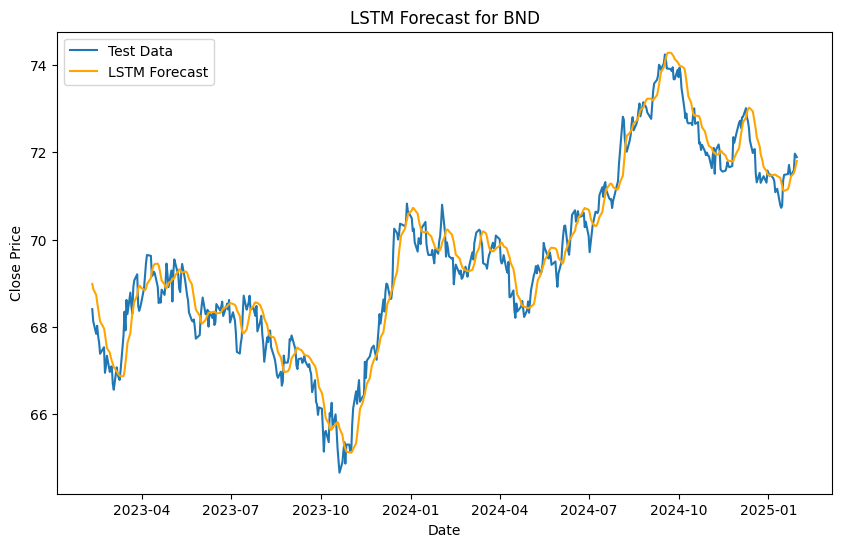


Processing SPY...
Epoch 1/20


c:\Users\Administrator.MMCY\OneDrive - MMCYTECH\Desktop\10a\GMF-Investments-W11\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0216
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.9070e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.8836e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 2.3944e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.1361e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.4395e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.6542e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.1334e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.3249e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.2990e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.1108e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 2.0926e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.0928e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.0014e-04
Epoch 15/20
62/62 ━━━━━━━━━━━━

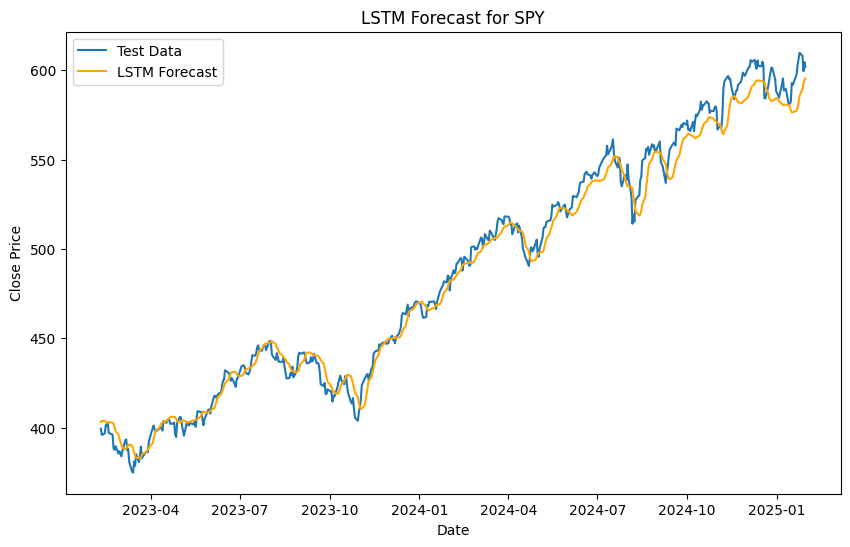

In [34]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Define Assets
assets = ['TSLA', 'BND', 'SPY']

# Step 2: Fetch Data
data = {asset: yf.download(asset, start="2015-01-01", end="2025-01-31") for asset in assets}

# Step 3: Process Data and Fit LSTM Models
for asset in assets:
    print(f"\nProcessing {asset}...")
    
    # Prepare the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[asset]['Close'].values.reshape(-1, 1))
    
    # Create the dataset for LSTM (using 60 previous days to predict the next day)
    def create_dataset(data, time_step=60):
        X, y = [], []
        for i in range(len(data) - time_step - 1):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)
    
    X, y = create_dataset(scaled_data)
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
    
    # Forecasting
    lstm_forecast = model.predict(X_test)
    lstm_forecast = scaler.inverse_transform(lstm_forecast.reshape(-1, 1))
    
    # Calculate Evaluation Metrics
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    mae = mean_absolute_error(y_test_actual, lstm_forecast)
    rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_forecast))
    mape = np.mean(np.abs((y_test_actual - lstm_forecast) / y_test_actual)) * 100
    
    print(f"LSTM Model Metrics for {asset}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    # Plot Results
    plt.figure(figsize=(10, 6))
    plt.plot(data[asset].index[-len(y_test_actual):], y_test_actual, label='Test Data')
    plt.plot(data[asset].index[-len(lstm_forecast):], lstm_forecast, label='LSTM Forecast', color='orange')
    plt.title(f'LSTM Forecast for {asset}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()